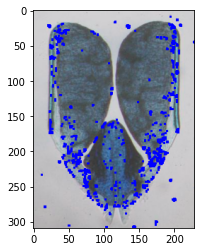

(<matplotlib.image.AxesImage at 0x2e8394085e0>, None)

In [11]:
# Harris Corner Detector in OpenCV

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt


filename = 'poli.png'
img = cv.imread(filename)

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(img),plt.show()

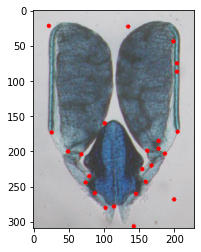

(<matplotlib.image.AxesImage at 0x2e83b506be0>, None)

In [12]:
# Shi-Tomasi Corner Detector

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt


img2 = cv.imread('poli.png')
gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
corners = cv.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(img2,(x,y),3,255,-1)
plt.imshow(img2),plt.show()


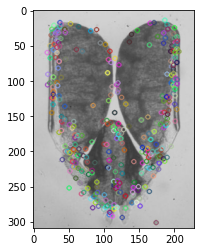

(<matplotlib.image.AxesImage at 0x21d16bb4640>, None)

In [2]:
# Scale-Invariant Feature Transform

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt


img3 = cv.imread('poli.png')
gray= cv.cvtColor(img3,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp = sift.detect(gray,None)
img3=cv.drawKeypoints(gray,kp,img3)
plt.imshow(img3),plt.show()

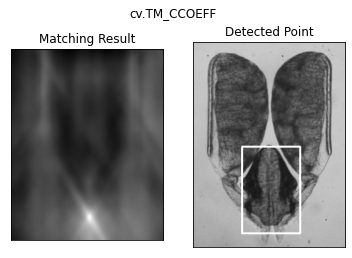

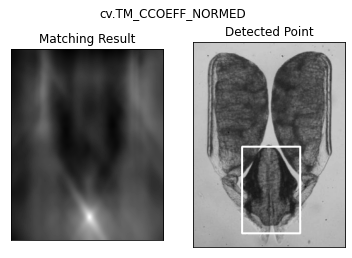

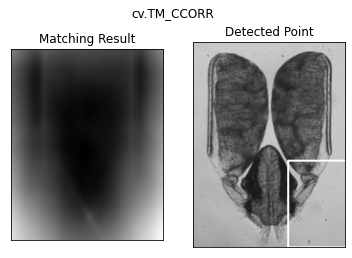

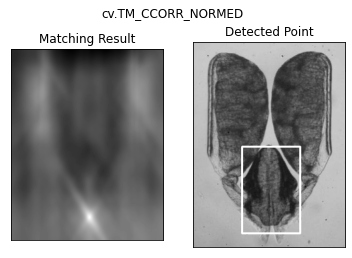

In [10]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('poli.png',0)
img2 = img.copy()
templates = []
template = cv.imread('retinaculum.png',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img,top_left, bottom_right, 255, 2)
        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(img,cmap = 'gray')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        plt.suptitle(meth)
        plt.show()

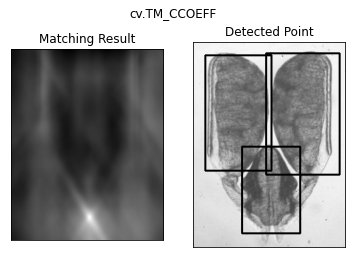

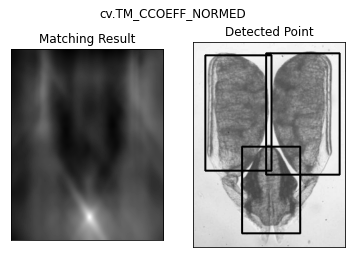

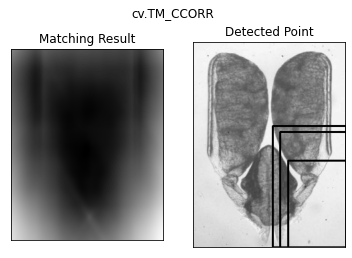

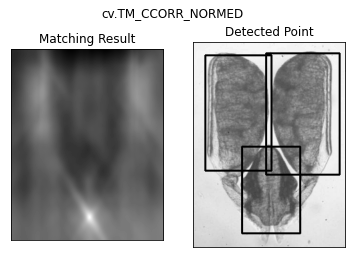

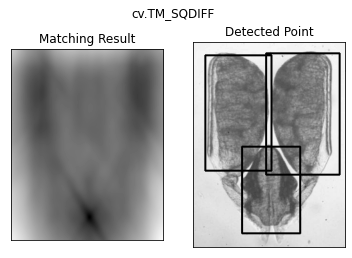

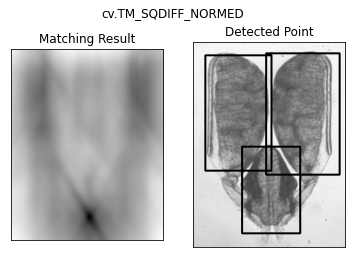

In [42]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('poli.png',0)
img2 = img.copy()
templates = ['retinaculum.png', 'left.png', 'right.png']
template = cv.imread(templates[0],0)
template2= cv.imread(templates[1],0)
template3 = cv.imread(templates[2],0)

w, h = template.shape[::-1]
w2, h2 = template2.shape[::-1]
w3, h3 = template3.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    res2 = cv.matchTemplate(img,template2,method)
    res3 = cv.matchTemplate(img,template3,method)


    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    min_val2, max_val2, min_loc2, max_loc2 = cv.minMaxLoc(res2)
    min_val3, max_val3, min_loc3, max_loc3 = cv.minMaxLoc(res3)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
        top_left2 = min_loc2
        top_left3 = min_loc3
    else:
        top_left = max_loc
        top_left2 = max_loc2
        top_left3 = max_loc3

    bottom_right = (top_left[0] + w, top_left[1] + h)
    bottom_right2 = (top_left2[0] + w2, top_left2[1] + h2)
    bottom_right3 = (top_left3[0] + w3, top_left3[1] + h3)

    cv.rectangle(img,top_left, bottom_right, 0, 2)
    cv.rectangle(img,top_left2, bottom_right2, 0, 2)
    cv.rectangle(img,top_left3, bottom_right3, 0, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

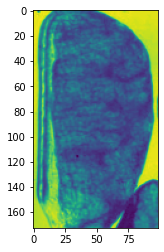

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('poli.png',0)
img2 = img.copy()
templates = ['retinaculum.png', 'left.png', 'right.png']

# template =  cv2.imread('retinaculum.png')
# window_name = 'image'
# plt.imshow(img)
for i in range(3):
    template = cv2.imread(templates[i],0)
    plt.imshow(template)



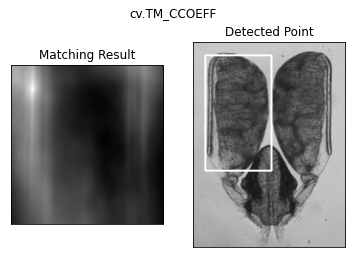

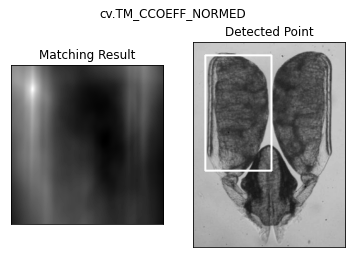

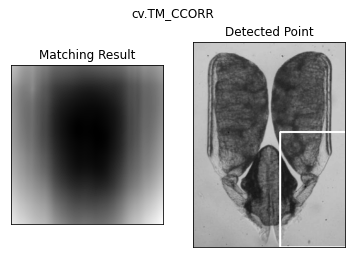

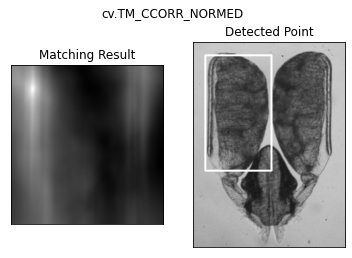

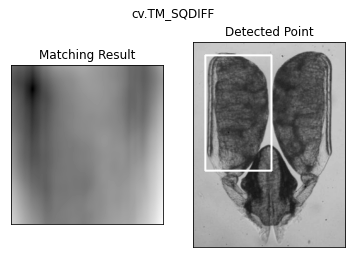

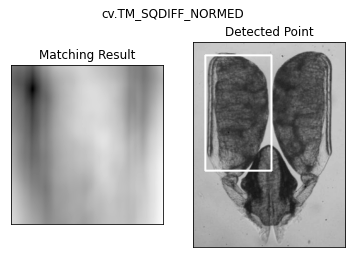

In [37]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('poli.png',0)
img2 = img.copy()
templates = ['retinaculum.png', 'left.png', 'right.png']

for i in range(3):
    template = cv.imread(templates[i],0)
    w, h = template.shape[::-1]
    # All the 6 methods for comparison in a list
    methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
                'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
    for meth in methods:
        img = img2.copy()
        method = eval(meth)
        # Apply template Matching
        res = cv.matchTemplate(img,template,method)
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
            bottom_right = (top_left[0] + w, top_left[1] + h)
            cv.rectangle(img,top_left, bottom_right, 255, 2)
            plt.subplot(121),plt.imshow(res,cmap = 'gray')
            plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
            plt.subplot(122),plt.imshow(img,cmap = 'gray')
            plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
            plt.suptitle(meth)
            plt.show()

In [25]:
temp = ['adfa', 'adsfasdgasdg', 'asdgadsfasd']

for i in temp:
    
    print (i)

adfa
adsfasdgasdg
asdgadsfasd
